In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Load the data

In [23]:
df = pd.read_csv('data/winequality-red.csv', sep=';')
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Explore the data

In [24]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**No missing values**

In [25]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**Correlation between quality and features are less than 50%. Likely to not have a good model**


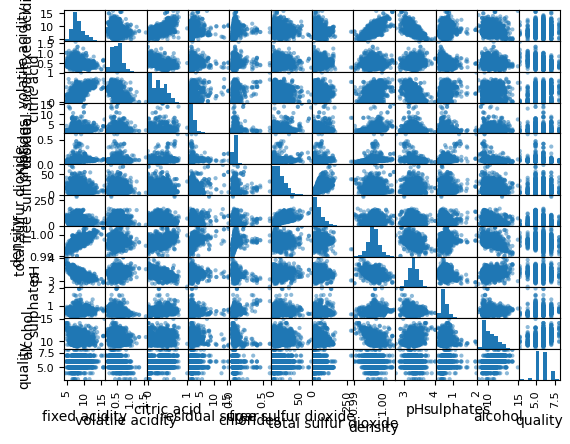

In [26]:
scatter_matrix(df)
plt.savefig('plots/wineQualityScatter.png')
plt.show()

**Some correlation can be seen in features like fixed_quality and density but nothing can be said when comparing features and target variable.**

## Spliting into train and test data

In [27]:
X = df.drop(columns = 'quality')
y = df.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

## Building the model

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('coefficient of determination R^2:', model.score(X_train, y_train))

intercept: 40.446226024100895
slope: [ 4.79622779e-02 -1.11840142e+00 -2.76227524e-01  2.04756941e-02
 -1.76890728e+00  5.34980397e-03 -3.44870744e-03 -3.67102234e+01
 -3.47701478e-01  9.29729469e-01  2.66278221e-01]
coefficient of determination R^2: 0.36558499214790485


**37% of the variation in y is explained by the model, bad model**

## Calculate the RMSE for test data

In [29]:
yhat = model.predict(X_test)
print(mean_squared_error(y_test, yhat, squared = False))

0.6189280908000773


**RMSE of 0.62 is quite low compared to an average quality of about 5.6**

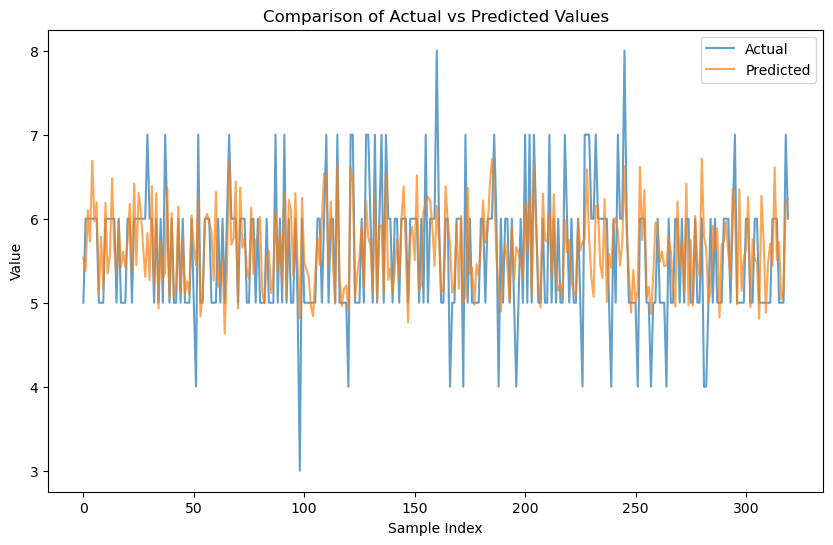

,Actual,Predicted
75,5,5.536655
1283,6,5.375703
408,6,6.099949
1281,6,5.727178
1118,6,6.688794


In [30]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual', alpha=0.7)
plt.plot(comparison_df['Predicted'].values, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.savefig('plots/wineQualityComparison.png')
plt.show()
comparison_df.head()

**Some data between 5 and 6 are predicted quite accurately. But actual quality higher or lower between 5 and 6 are predicted badly. This is a bad model.**